In [2]:
from os import getcwd
from os.path import join, basename
from sys import path 

libs_dir = join("/".join(getcwd().split("/")[:-3]))
path.append(libs_dir)

filename = basename(globals()['__vsc_ipynb_file__']).split(".")[0]


import numpy as np
from libs.qchannel_model import *
import matplotlib.pyplot as plt
from libs.figure_config import *
from libs.default_parameters import *
from libs.simulation_tools import *
from qiskit_aer import AerSimulator
from libs.satellite import *

In [9]:
satellite_1293 = LEOsatellite(
    libs_dir + '/data/STARLINK_1293.txt')
location_aizu = np.loadtxt(
    libs_dir + '/data/ogs_loc.txt')
location_sendai = np.loadtxt(
    libs_dir + '/data/ogs_loc_sendai.txt')
year = 2021
day = 357
hour = 16
minute = 29

t = np.arange(0, 241, 10) 
second = 56 + t 
utc = 9

latitude_bob = location_aizu[:, 0]
longitude_bob = location_aizu[:, 1]
elevation_bob = location_aizu[:, 2]

latitude_alice = location_sendai[:, 0]
longitude_alice = location_sendai[:, 1]
elevation_alice = location_sendai[:, 2]

# bob用のリスト
slant_path_bob_lst = np.zeros(len(second))
zenith_angle_bob_lst = np.zeros(len(second))

# alice用のリスト
slant_path_alice_lst = np.zeros(len(second))
zenith_angle_alice_lst = np.zeros(len(second))

for idx in range(len(second)):
    # bobとの幾何学的関係を計算
    slant_path_bob_lst[idx], zenith_angle_bob_lst[idx] = satellite_1293.computeGeometricWithUser(
        year, day, hour, minute, second[idx], utc,
        longitude_bob[0], latitude_bob[0], elevation_bob[0] # bobが単一の場合、[0]でアクセス
    )

    slant_path_alice_lst[idx], zenith_angle_alice_lst[idx] = satellite_1293.computeGeometricWithUser(
        year, day, hour, minute, second[idx], utc,
        longitude_alice[0], latitude_alice[0], elevation_alice[0]
    )

slant_path_bob_lst = slant_path_bob_lst * 1000
slant_path_alice_lst = slant_path_alice_lst * 1000
print(f'zenith_angle_alice_deg: {zenith_angle_alice_lst}')
print(f'zenith_angle_bob_deg: {zenith_angle_bob_lst}')


zenith_angle_alice_deg: [59.82220731 57.20571    54.31536344 51.11731306 47.5796426  43.67872882
 39.41103877 34.81442487 30.00638313 25.25323752 21.08758441 18.41782064
 18.22698246 20.60210441 24.62188856 29.33180312 34.15113304 38.78495184
 43.10028831 47.05110381 50.63677524 53.87901238 56.80904791 59.46070142
 61.86681358]
zenith_angle_bob_deg: [59.12231128 56.36761957 53.29942595 49.86960124 46.02580343 41.71462467
 36.88795594 31.51443373 25.59889386 19.2177631  12.61487602  6.7674352
  6.48171328 12.17404931 18.77234156 25.17778075 31.12682233 36.53619297
 41.39769812 45.74103304 49.61362622 53.06877427 56.15900865 58.93278366
 61.43314946]


In [5]:
tau_zen_lst = np.array([0.81, 0.75, 0.55])

qber_alice_values = np.zeros((len(tau_zen_lst), len(zenith_angle_alice_lst)))
yield_alice_values = np.zeros((len(tau_zen_lst), len(zenith_angle_alice_lst)))
qber_bob_values = np.zeros((len(tau_zen_lst), len(zenith_angle_bob_lst)))
yield_bob_values = np.zeros((len(tau_zen_lst), len(zenith_angle_bob_lst)))
# qber_values = np.zeros((len(tau_zen_lst), len(zenith_angle_alice_lst)))
# yield_values = np.zeros((len(tau_zen_lst), len(zenith_angle_alice_lst)))
skr_values = np.zeros((len(tau_zen_lst), len(zenith_angle_alice_lst)))

In [ ]:
qber_values = 0
yield_values = 0
print(f'n_s: {n_s}')

# zenith_angle_alice = 50.64212895118103
# zenith_angle_bob = 49.613626223965305
# slant_path_alice = 827420.1883811636
# slant_path_bob = 812369.62519035

zenith_angle_alice = 53.8842799136289
zenith_angle_bob = 53.068774274942385
slant_path_alice = 878627.474372043
slant_path_bob = 864611.5480203732


# zenith_angle_alice = 56.81419114994205
# zenith_angle_bob = 56.15900865093785
# slant_path_alice = 932252.9600211545
# slant_path_bob = 919183.5901488643

w_L_alice = slant_path_alice * theta_rad
w_L_bob = slant_path_bob * theta_rad

zenith_angle_alice_deg = zenith_angle_alice
zenith_angle_alice_rad = np.radians(zenith_angle_alice_deg)

zenith_angle_bob_deg = zenith_angle_bob
zenith_angle_bob_rad = np.radians(zenith_angle_bob_deg)

qber_values, yield_values = compute_avg_qber_bbm92(
            sigma_theta_x, sigma_theta_y,
            slant_path_alice, slant_path_bob,
            mu_x, mu_y,
            zenith_angle_alice_rad, zenith_angle_bob_rad,
            h_OGS, h_atm,
            w_L_alice, w_L_bob,
            0.55, 0.55,
            Cn2_profile, a,
            e_0, e_d, Y0_A, Y0_B,
            lambda_signal, wavelength
        )

print(f"qber: {qber_values*100:.2f}%")
# qber: 3.94%
# qber: 3.65%
# qber: 20.85%




n_s: 0.8


KeyboardInterrupt: 

In [10]:

for idx in range(len(tau_zen_lst)):
    print(f"tau_zen = {tau_zen_lst[idx]}")
    tau_zen = tau_zen_lst[idx]
    for jdx in range(len(zenith_angle_alice_lst)):
        print(f"zenith_angle_alice = {zenith_angle_alice_lst[jdx]}")
        print(f"zenith_angle_bob = {zenith_angle_bob_lst[jdx]}")
        print(f"slant_path_alice = {slant_path_alice_lst[jdx]}")
        print(f"slant_path_bob = {slant_path_bob_lst[jdx]}")
        
        # zenith_angle_alice = 53.8842799136289
        # zenith_angle_bob = 53.068774274942385
        # slant_path_alice = 878627.474372043
        # slant_path_bob = 864611.5480203732
        
        w_L_alice = slant_path_alice * theta_rad
        w_L_bob = slant_path_bob * theta_rad
        
        zenith_angle_alice_deg = zenith_angle_alice
        zenith_angle_alice_rad = np.radians(zenith_angle_alice_deg)
        
        zenith_angle_bob_deg = zenith_angle_bob
        zenith_angle_bob_rad = np.radians(zenith_angle_bob_deg)

        
        # ここでcompute_avg_qber_bbm92関数を呼び出す
        # qber_values[idx][jdx], yield_values[idx][jdx] = compute_avg_qber_bbm92(
        #     sigma_theta_x, sigma_theta_y,
        #     slant_path_alice_lst[jdx], slant_path_bob_lst[jdx],
        #     mu_x, mu_y,
        #     zenith_angle_alice_rad, zenith_angle_bob_rad,
        #     h_OGS, h_atm,
        #     w_L_alice, w_L_bob,
        #     tau_zen, tau_zen,
        #     Cn2_profile, a,
        #     e_0, e_d, Y0_A, Y0_B,
        #     lambda_signal, wavelength
        # )
        # if qber_values[idx][jdx]*100 < 3.7:
        #     print(f"zenith_angle_alice = {zenith_angle_alice_lst[jdx]}")
        #     print(f"QBER: {qber_values[idx][jdx]*100:.2f}%")


        # 1秒あたりの安全な鍵の長さを計算します
        # final_key_rate = compute_SKR_BBM92_finite(
        #     total_sifted_bits_per_sec,
        #     qber_x,
        #     qber_z,
        #     f_ec=1
        # )
        

        # skr_values[idx][jdx] = compute_SKR_without_Eve(
        #     qber_alice_values[idx][jdx], 
        #     yield_alice_values[idx][jdx], 
        #     qber_bob_values[idx][jdx], 
        #     yield_bob_values[idx][jdx],
        #     f_ec=1,       
        #     rep_rate=1e9  
        # )
        
       


tau_zen = 0.81
zenith_angle_alice = 59.82220730839251
zenith_angle_bob = 59.12231127527512
slant_path_alice = 995551.8750584136
slant_path_bob = 979281.4225898753
zenith_angle_alice = 57.20571000088845
zenith_angle_bob = 56.36761956786829
slant_path_alice = 939675.4032430457
slant_path_bob = 922680.9757897548
zenith_angle_alice = 54.315363439554005
zenith_angle_bob = 53.29942594716633
slant_path_alice = 885768.969577282
slant_path_bob = 867989.7311225771
zenith_angle_alice = 51.11731305941961
zenith_angle_bob = 49.869601238446236
slant_path_alice = 834221.2841892522
slant_path_bob = 815598.7685467949
zenith_angle_alice = 47.57964259638218
zenith_angle_bob = 46.02580342604772
slant_path_alice = 785503.2970223349
slant_path_bob = 765986.8854239688
zenith_angle_alice = 43.6787288239362
zenith_angle_bob = 41.71462466897574
slant_path_alice = 740180.0661241943
slant_path_bob = 719735.3346597403
zenith_angle_alice = 39.41103877325698
zenith_angle_bob = 36.88795593594212
slant_path_alice = 69

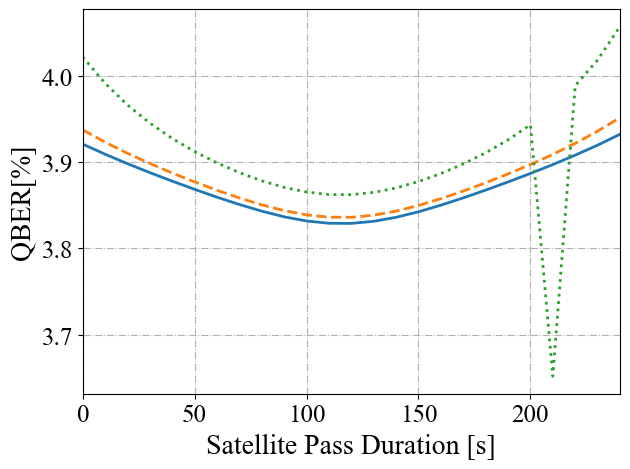

In [8]:
plt.plot(t, qber_values[0][:]*100)
plt.plot(t, qber_values[1][:]*100, ls='--')
plt.plot(t, qber_values[2][:]*100, ls=':')

plt.xlabel(r"Satellite Pass Duration [s]")
plt.ylabel(r"QBER[%]")

plt.xlim(0, 240)

plt.grid()
plt.tight_layout()
# plt.savefig(f'results/qber_{n_s}.png')
# print(f"✅ Saved as: qber_{n_s}.png")

In [7]:
np.save('results/qber_analysis_bbm92_test1_8', qber_values)

findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times Ne

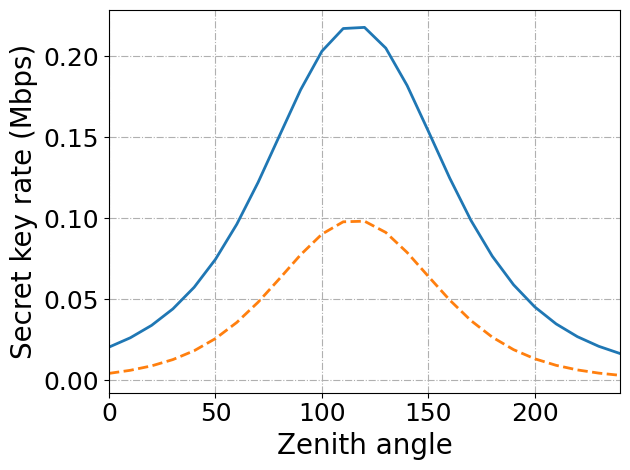

In [8]:
# Q_1, e_1 = compute_Q_1_e_1_ex(
#             sigma_theta_x, sigma_theta_y, slant_path_lst[jdx], mu_x, mu_y,
#             zenith_angle_rad, h_OGS, h_atm, w_L, tau_zen, Cn2_profile,
#             a, e_0, p_dark, e_pol, p_AP, n_s, wavelength
#         )
# skr_values[idx][jdx] = compute_SKR(
#             qber_values[idx][jdx], yield_values[idx][jdx], Q_1, e_1
#         )


plt.plot(t, skr_values[0][:]/10**6)
plt.plot(t, skr_values[1][:]/10**6, ls='--')
# plt.plot(t, skr_values[2][:]/10**6, ls=':')


# plt.plot(zenith_angle_deg_list, yield_values[0][:])
# plt.plot(zenith_angle_deg_list, yield_values[1][:], ls='--')

plt.xlabel(r"Zenith angle")
plt.ylabel(r"Secret key rate (Mbps)")

plt.xlim(0, 240)

plt.grid()
plt.tight_layout()
# plt.savefig(f'results/skr_{n_s}.png')
# print(f"✅ Saved as: skr_{n_s}.png")

In [9]:
np.save('results/skr_analysis_bbm92_test1_8', skr_values)

In [7]:
np.save('results/qber_analysis', qber_values)
np.save('results/skr_analysis', skr_values)